In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import os

# Now load the Excel file from the current directory
df = pd.read_excel('Figure_1G_data.xlsx')


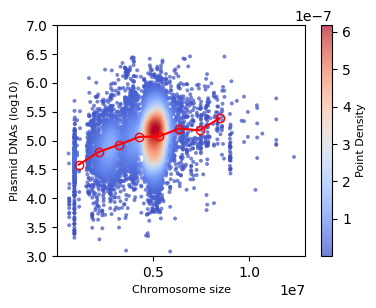

In [ ]:


# Extract the specific columns you need for x and y0
x = df.iloc[:, 3]  # 4th column for x (index 3)
y0 = df.iloc[:, 5]  # 6th column for y0 (index 5)

# Calculate the point density
y = np.log10(y0)
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

# Create bins for x-axis
num_bins = 8
bins = np.linspace(x.min(), 0.9*10**7, num_bins + 1)
bin_indices = np.digitize(x, bins)

# Calculate binned averages of y values
binned_y_means = []
for i in range(1, num_bins + 1):
    bin_mask = bin_indices == i
    if np.any(bin_mask):
        binned_y_means.append(np.mean(y[bin_mask]))
    else:
        binned_y_means.append(np.nan)

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Create the scatter plot
plt.figure(figsize=(4, 3))
sc = plt.scatter(x, y, c=z, s=8, edgecolor='none', cmap='coolwarm', alpha=0.7)  # Apply color map

# Add the color bar for density
cb = plt.colorbar(sc)  # Add color bar for the density
cb.set_label('Point Density', fontsize=8)  # Label the color bar

# Set the y-axis limits
plt.ylim(3, 7)

# Plot binned averages
plt.plot(bin_centers, binned_y_means, 'ro-', fillstyle='none', label='Binned Averages')

# Set plot title and labels
plt.xlabel('Chromosome size', fontsize=8)
plt.ylabel('Plasmid DNAs (log10)', fontsize=8)

# Save the figure
plt.savefig('Figure_1G.pdf', bbox_inches='tight')
plt.show()  # Display the plot
